In [1]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
os.getcwd()

'/Users/cholponzhakshylykova/Desktop/SDS/Heart-Attack-Risk'

In [3]:
#import the data
data = pd.read_csv("/Users/cholponzhakshylykova/Desktop/SDS/Heart-Attack-Risk/heart_failure.csv")

In [4]:
#data exploration
data.head()
data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
#some columns names are very long therefore I want to rename them. 
data.columns = ['age', 'anaemia', 'CP', 'diabetes', \
       'EF', 'HBP', 'platelets', \
       'SC', 'Na', 'sex', 'smoking', 'time', \
       'death']

In [8]:
data.head()

,age,anaemia,CP,diabetes,EF,HBP,platelets,SC,Na,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
#convert columns with  0,1 data into categorical data
data.anaemia = data.anaemia.astype("category")
data.diabetes = data.diabetes.astype("category")
data.HBP = data.HBP.astype("category")
data.sex = data.sex.astype("category")
data.smoking = data.smoking.astype("category")
data.death = data.death.astype("category")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        299 non-null    float64 
 1   anaemia    299 non-null    category
 2   CP         299 non-null    int64   
 3   diabetes   299 non-null    category
 4   EF         299 non-null    int64   
 5   HBP        299 non-null    category
 6   platelets  299 non-null    float64 
 7   SC         299 non-null    float64 
 8   Na         299 non-null    int64   
 9   sex        299 non-null    category
 10  smoking    299 non-null    category
 11  time       299 non-null    int64   
 12  death      299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage: 19.0 KB


In [11]:
data.death.cat.categories

Index([0, 1], dtype='int64')

In [12]:
# identify the outliers  for each of the feature

# z score identifies outliers far from the mean
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

#select only numeric columns
z_score = data.select_dtypes(include=["number"]).apply(zscore)
outliers = (z_score.abs() > 3).sum()
print(outliers)


age          0
CP           7
EF           1
platelets    3
SC           6
Na           3
time         0
dtype: int64


In [13]:
# machine learning method for the outlier detection
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_labels = lof.fit_predict(data.select_dtypes(include=['number']))  # Only numeric data
data['Outlier'] = outlier_labels  # -1 means outlier, 1 means normal

print(data['Outlier'].value_counts())  # Count outliers

# so there are only three outliers so I will leave them and wont remove

Outlier
 1    296
-1      3
Name: count, dtype: int64


In [14]:
data.columns

Index(['age', 'anaemia', 'CP', 'diabetes', 'EF', 'HBP', 'platelets', 'SC',
       'Na', 'sex', 'smoking', 'time', 'death', 'Outlier'],
      dtype='object')

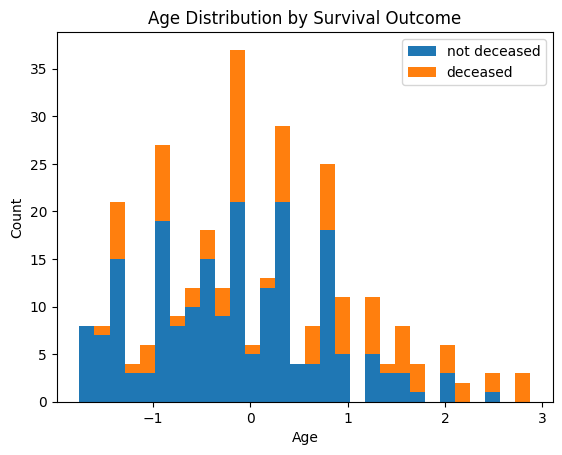

In [18]:
# I found interesting to know what is the age distribution of people with and without heart diesease. 
# plot with the raw data

import matplotlib.pyplot as plt

list1 = list()
outcomelabels = list()
labels = {0:"not deceased",1:"deceased"}
for outcome in data.death.cat.categories:
    list1.append(data[data["death"] == outcome]["age"])
    outcomelabels.append(labels[outcome])
h = plt.hist(list1, bins = 30, stacked = True, rwidth = 1, label = outcomelabels)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival Outcome")
plt.legend(loc = "upper right")
plt.show()


<Figure size 1200x800 with 0 Axes>

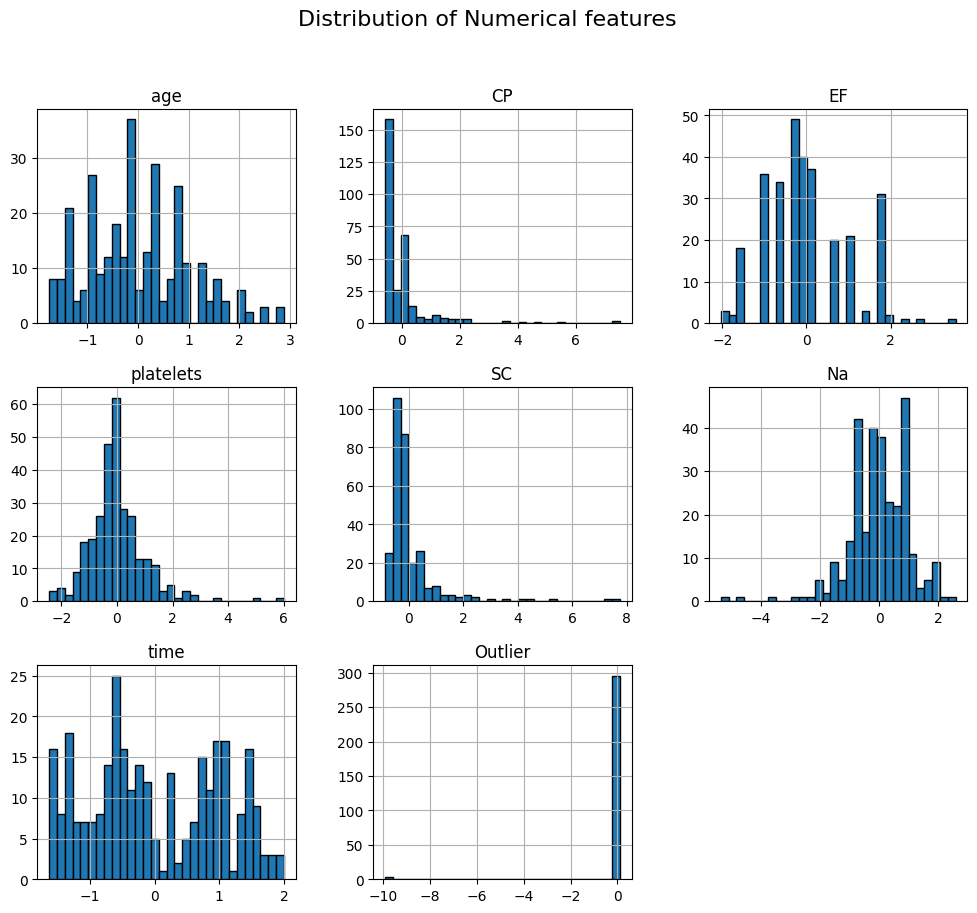

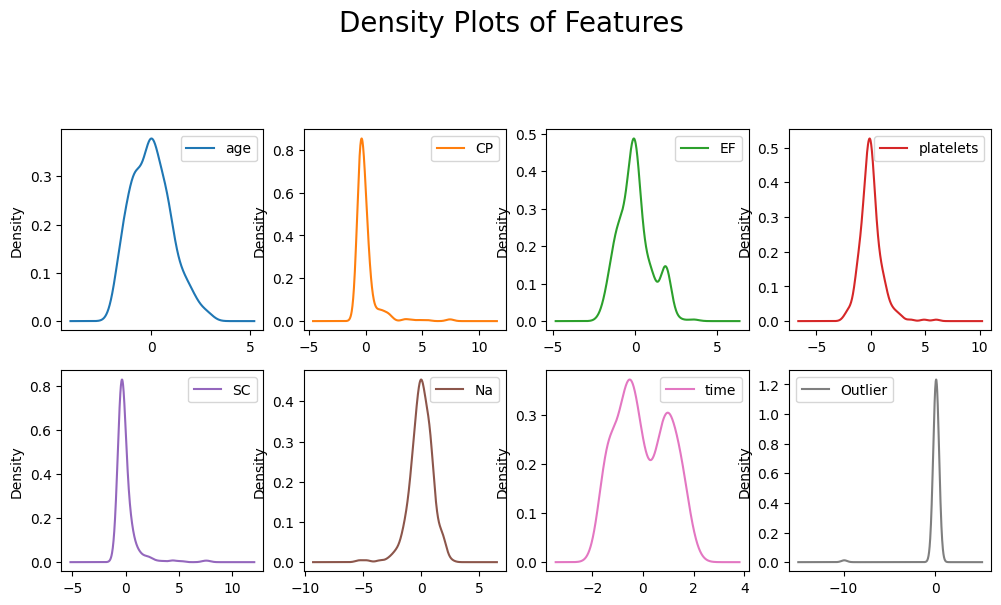

In [27]:
# make a correlation plot between the features
import matplotlib.pyplot as plt
import seaborn as sns
#set figure size
plt.figure(figsize=(12,8))

#plot histogram for each numerical column
data.hist(bins=30, figsize=(12,10), edgecolor="black")
plt.suptitle("Distribution of Numerical features", fontsize = 16)
plt.show()




data.plot(kind="density", subplots=True, layout=(4,4), figsize=(12,12), sharex=False)
plt.suptitle("Density Plots of Features", fontsize = 20)
plt.show()

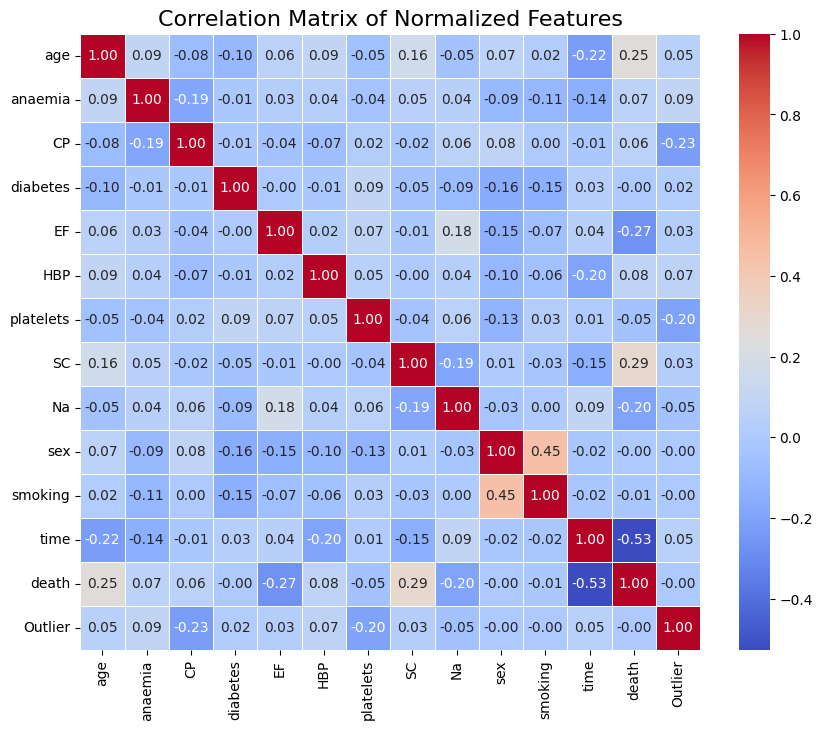

In [31]:
# normalize the data with standartscaler 
numeric_data = data.select_dtypes(include="number").columns

#normalize only the numeric data columns using Standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_data]=scaler.fit_transform(data[numeric_data])

#calculate the correlation matrix
correlation_matrix = data.corr()

#plot the correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar = True, linewidths=0.5)
plt.title("Correlation Matrix of Normalized Features", fontsize =16)
plt.show()

In [32]:
# F-statistics for correlation 



In [ ]:
##### Data analysis
#1 collect data
#2 identify trends
#3 